# Google Play Store: How to get good rating

I am learning about React Native. I want to create an application then public it on Google Play Store. However, I don't want to create an useless application. That's why I need to dig deep inside the dataset of Google Play Store to find out the way to make my app has good rating.

## Analyze the dataset

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re

app_data = pd.read_csv('googleplaystore.csv')
review_data = pd.read_csv('googleplaystore_user_reviews.csv', encoding='latin-1')

**Check the detail of the datasets to get the column details**

In [75]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Do some query to test duplicated items and empty value**

In [76]:
pd.concat(g for _, g in app_data.groupby("App") if len(g) > 1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up


In [77]:
app_data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [78]:
app_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [79]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [80]:
app_data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [81]:
app_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

**Problems**

* Remove duplicated items and "nan" value
* All number or float values are presented as a object type, so we change them to int or float type

In [82]:
app_data = app_data.replace('Varies with device', np.nan)
app_data.dropna(inplace=True)
app_data.drop_duplicates(subset = 'App', inplace = True)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 10837
Data columns (total 13 columns):
App               6953 non-null object
Category          6953 non-null object
Rating            6953 non-null float64
Reviews           6953 non-null object
Size              6953 non-null object
Installs          6953 non-null object
Type              6953 non-null object
Price             6953 non-null object
Content Rating    6953 non-null object
Genres            6953 non-null object
Last Updated      6953 non-null object
Current Ver       6953 non-null object
Android Ver       6953 non-null object
dtypes: float64(1), object(12)
memory usage: 760.5+ KB


In [83]:
app_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '50,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '1,000,000,000+', '5+', '50+', '1+'], dtype=object)

**The value is an object, so we need to convert it to a number**

In [84]:
app_data['Installs'] = app_data['Installs'].apply(lambda x: int(re.sub(',|\+','', x)))
app_data['Installs'].unique()

array([     10000,     500000,    5000000,     100000,      50000,
          1000000,   10000000,       5000,  100000000,   50000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

In [85]:
app_data['Reviews'].unique()

array(['159', '967', '87510', ..., '885', '603', '1195'], dtype=object)

In [86]:
app_data['Reviews'] = app_data['Reviews'].apply(lambda x: int(x))
app_data['Reviews'].unique()

array([  159,   967, 87510, ...,   885,   603,  1195])

In [87]:
app_data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [88]:
app_data['Price'] = app_data['Price'].apply(lambda x: float(re.sub('\$','', x)))
app_data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [89]:
app_data['Size'].unique()

array(['19M', '14M', '8.7M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M', '4.2M',
       '23M', '6.0M', '25M', '6.1M', '4.6M', '9.2M', '5.2M', '11M', '24M',
       '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M', '56M', '57M',
       '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M', '27M',
       '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [90]:
app_data['Size'] = app_data['Size'].apply(lambda x: re.sub('M','', x))
app_data['Size'] = app_data['Size'].apply(lambda x: float(re.sub('k','', x))/1000 if 'k' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x: int(float(x)*1000))
app_data['Size'].unique()

array([ 19000,  14000,   8700,   2800,   5600,  29000,  33000,   3100,
        28000,  12000,  20000,  21000,  37000,   5500,  17000,  39000,
        31000,   4200,  23000,   6000,  25000,   6100,   4600,   9200,
         5200,  11000,  24000,   9400,  15000,  10000,   1200,  26000,
         8000,   7900,  56000,  57000,  35000,  54000,    201,   3600,
         5700,   8600,   2400,  27000,   2700,   2500,   7000,  16000,
         3400,   8900,   3900,   2900,  38000,  32000,   5400,  18000,
         1100,   2200,   4500,   9800,  52000,   9000,   6700,  30000,
         2600,   7100,  22000,   6400,   3200,   8200,   4900,   9500,
         5000,   5900,  13000,  73000,   6800,   3500,   4000,   2300,
         2100,  42000,   9100,  55000,     23,   7300,   6500,   1500,
         7500,  51000,  41000,  48000,   8500,  46000,   8300,   4300,
         4700,   3300,  40000,   7800,   8800,   6600,   5100,  61000,
        66000,     79,   8400,   3700,    118,  44000,    695,   1600,
      

## After that, we can have a clean data to analyze

**Now we are looking on "Rating" to see how the user rates an application, and find the factor that impact the rating.**

In [91]:
app_data['Rating'].describe()

count    6953.000000
mean        4.159615
std         0.560543
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**Wow, once user rates a number, it is usually between 4 and 4.5. So does the app that is downloaded a lot have a great "Rating" and have a lot of "Reviews"?**

<Figure size 1440x1440 with 0 Axes>

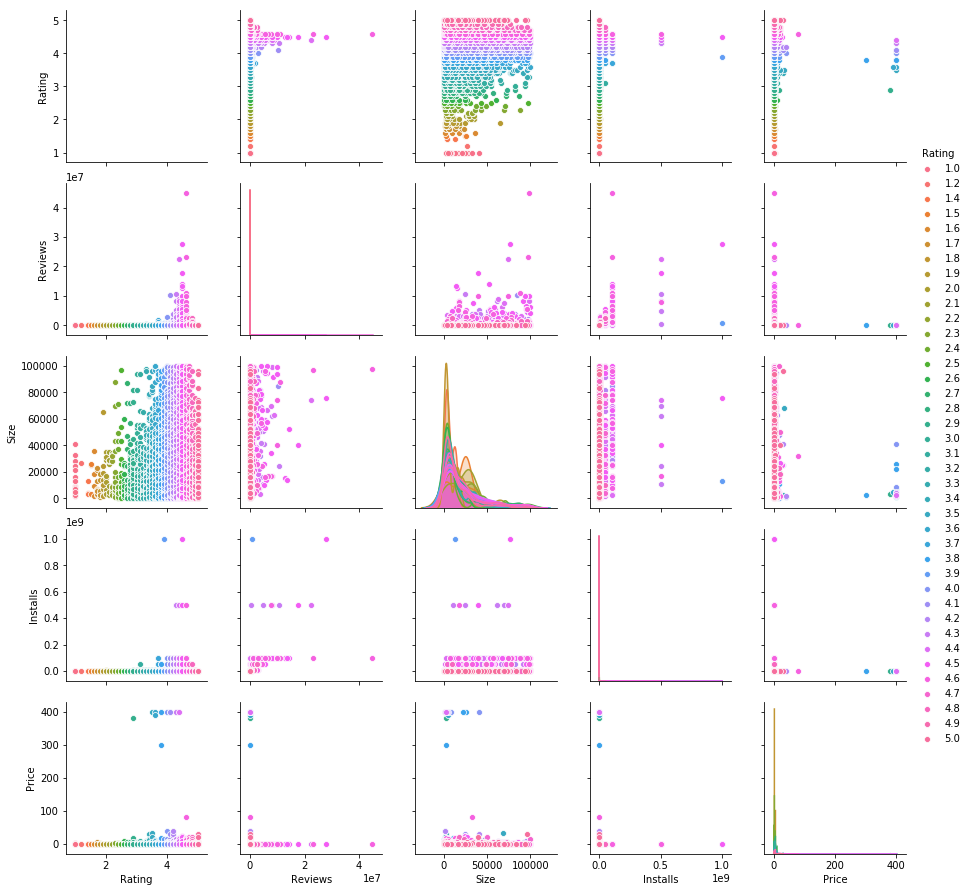

In [92]:
plt.figure(figsize=(20,20))
sns.pairplot(app_data, hue="Rating")

**With this chart, we can see high Rating need**

* High Reviews
* High Installs
* High Price

**However, lower Reviews, Installs or Price still have high Rating, we don't know is it a fake rating from a crazy user or fake account of a developer that made that app**

**Now we will check the Rating status of each Category**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

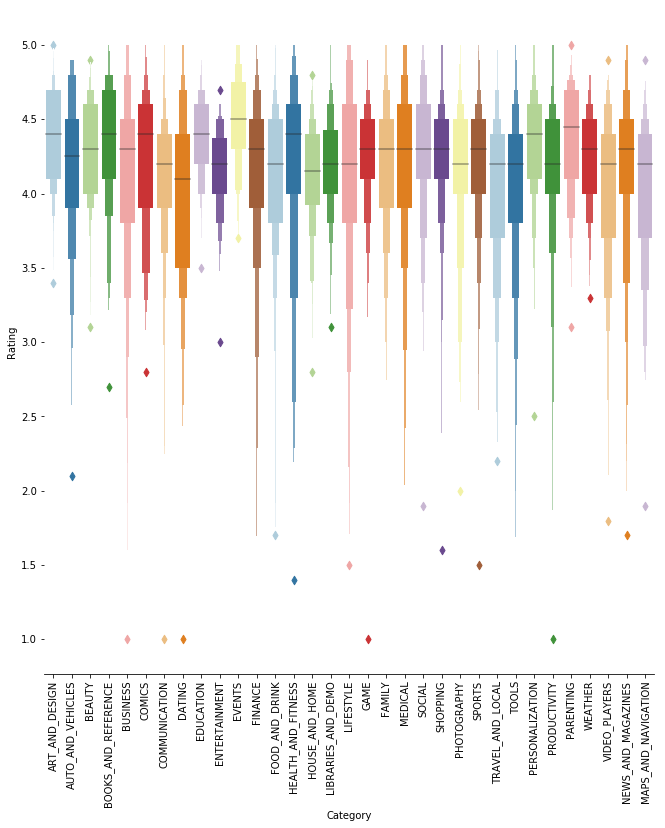

In [93]:
g = sns.catplot(x="Category",y="Rating",data=app_data, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
plt.xticks(rotation=90)

**ART_AND_DESIGN, EDUCATION, EVENTS and WEATHER have high Rating with always greater than 3**

**Now we will focus on 4 categories above to see the number of Installs and apps**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

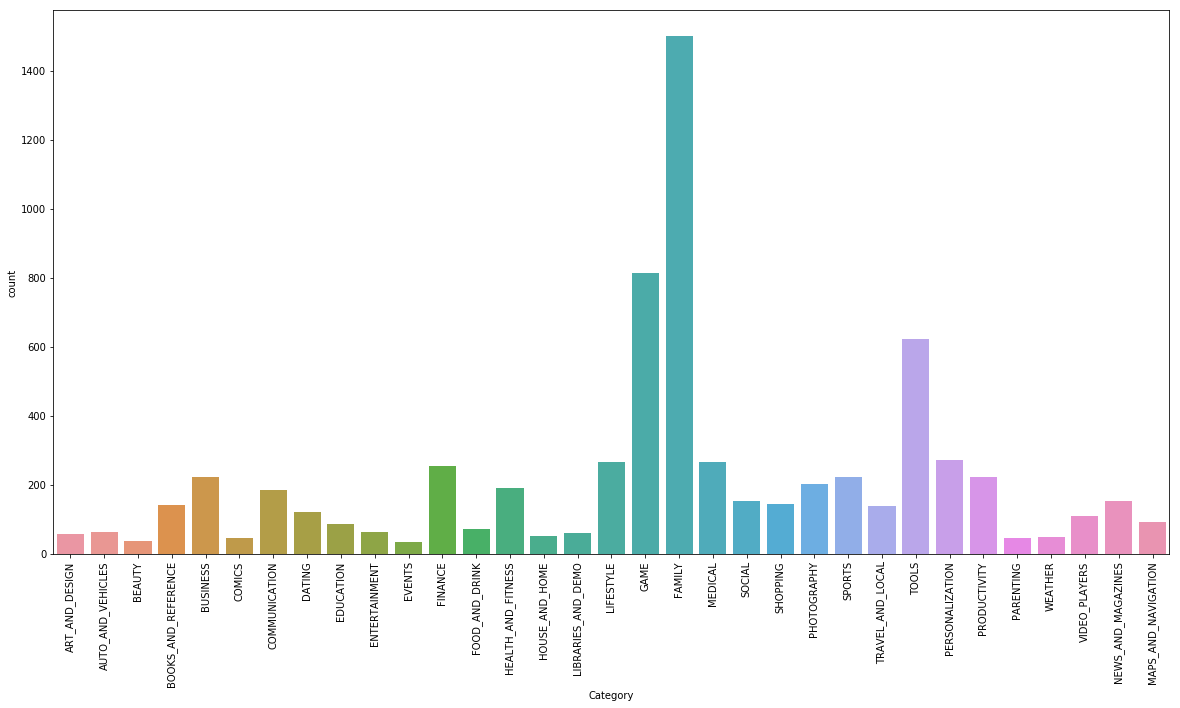

In [94]:
plt.figure(figsize=(20,10)) 
sns.countplot(app_data['Category'])
plt.xticks(rotation=90)

**Number of apps of 4 categories above are not so many, below ~150 apps**

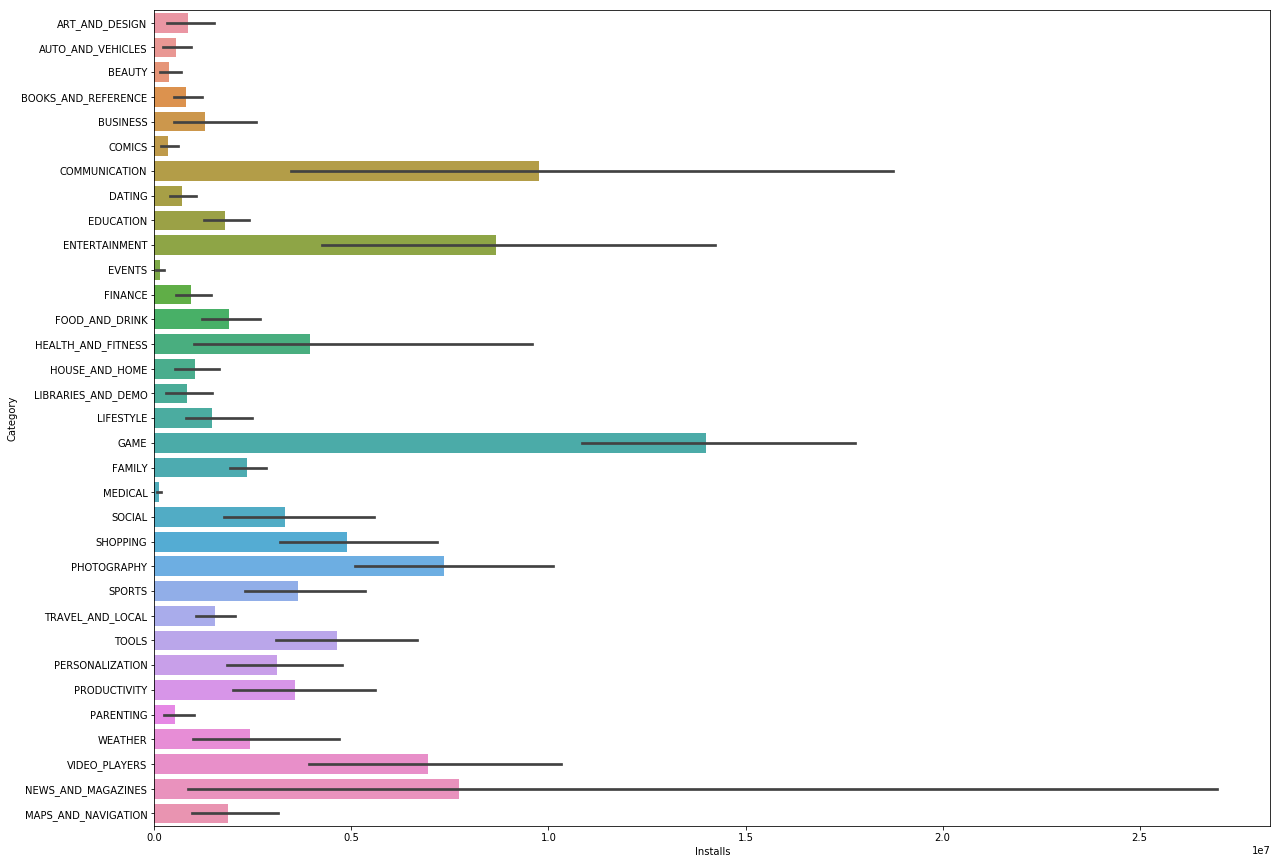

In [95]:
plt.figure(figsize=(20,15)) 
sns.barplot(x="Installs", y="Category", data=app_data, orient="h")

**Number of Installs of those categories is not heigh either. So those categories have true users with useful functions and without trash**

**Let find the top 10 of Installs**

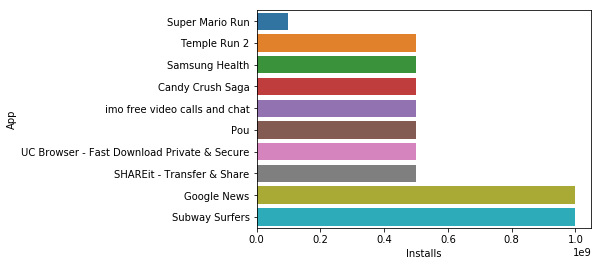

In [96]:
top_10 = app_data.sort_values(by=['Installs']).tail(10)
sns.barplot(y= top_10['App'], x = top_10['Installs'],orient = 'h')

In [97]:
top_10["Type"].unique()

array(['Free'], dtype=object)

**Some of top install apps come from wellknown companies: Google, Facebook.... Somes is a funny game type easy to play**

In [98]:
top_10["Category"].unique()

array(['GAME', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'TOOLS',
       'NEWS_AND_MAGAZINES'], dtype=object)

**Let take a look at Paid applications**

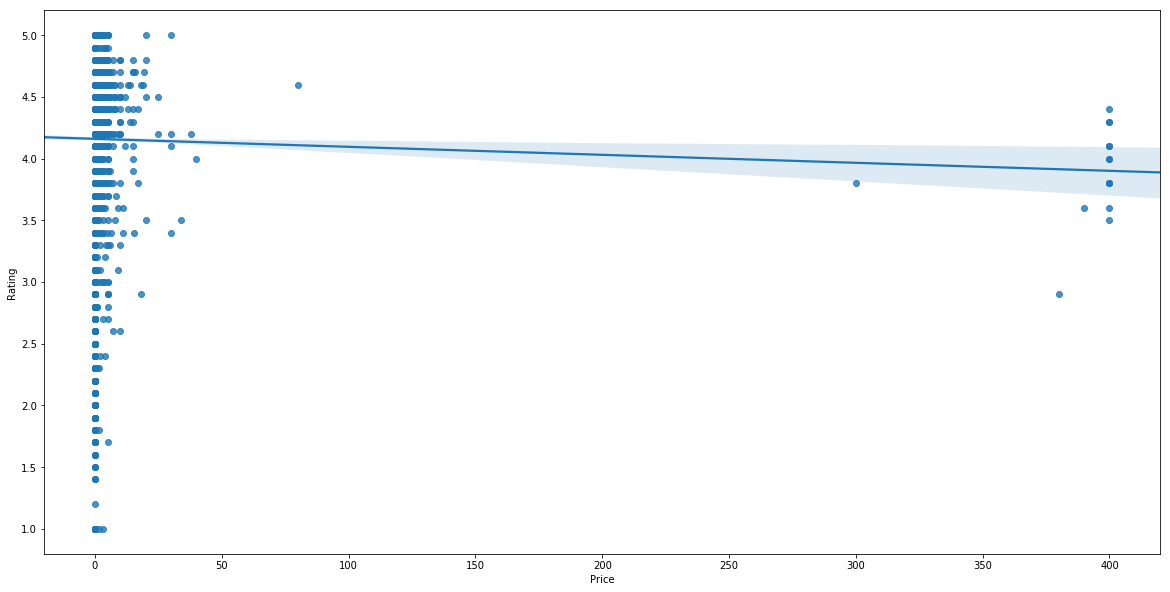

In [99]:
plt.figure(figsize=(20,10))
sns.regplot(x="Price", y="Rating", data=app_data);

**Paid apps have a good Rating, maybe they don't have advertise or they are well-developed. Let check the top of price apps**

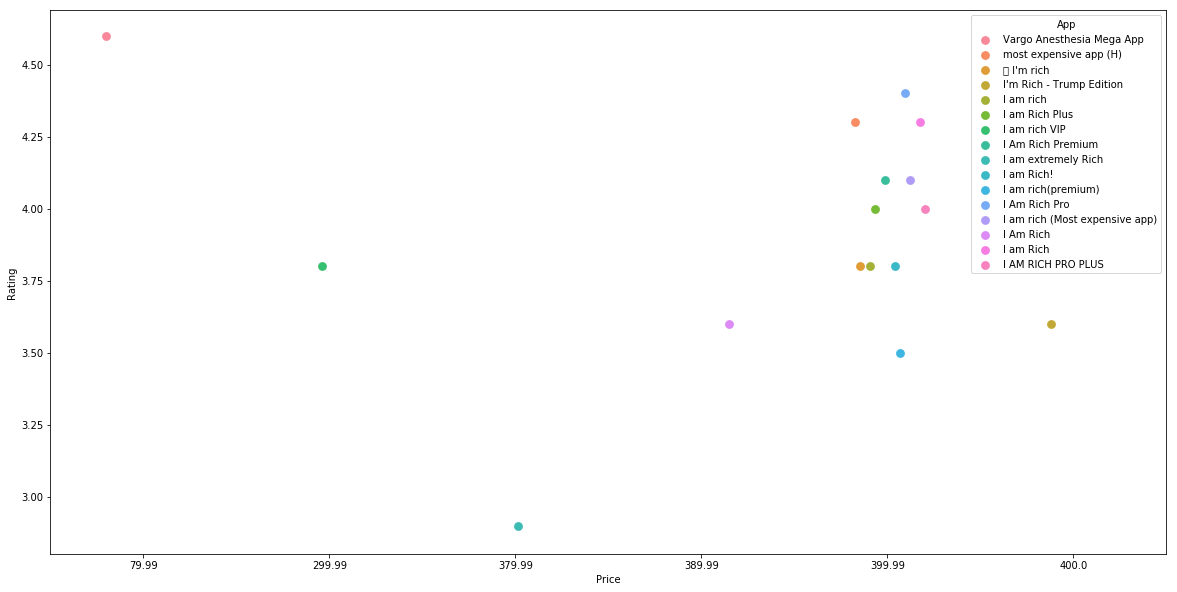

In [100]:
plt.figure(figsize=(20,10))
high_price_app = app_data[app_data["Price"] > 50]
sns.pointplot(x="Price", y="Rating", hue="App", data=high_price_app, dodge=True)

**Suprised! High price apps are trash apps. I don't know why people paid for them. They want to prove themself rich?**

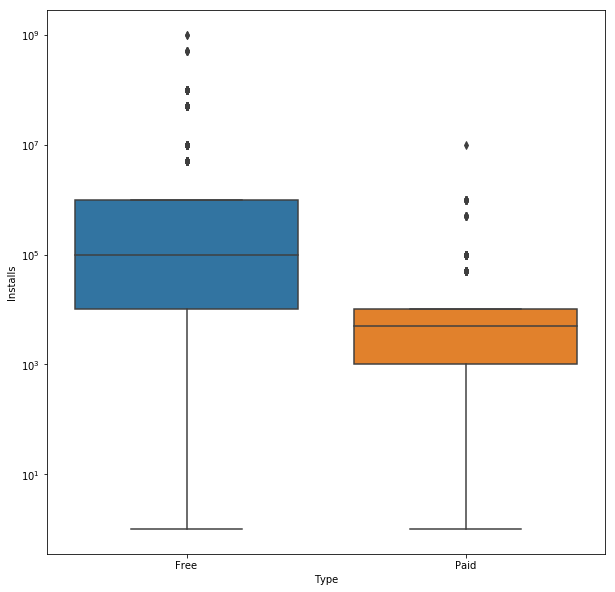

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(x ='Type',y ='Installs', data=app_data)
plt.yscale('log')

**Free apps have high Installs**

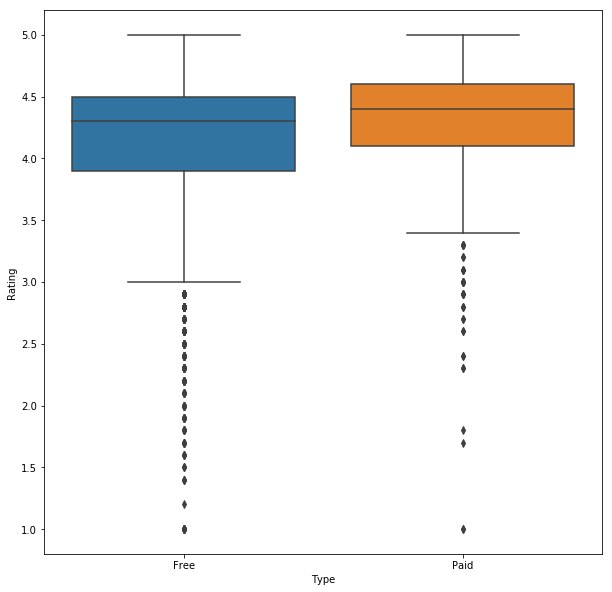

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(x ='Type',y ='Rating', data=app_data)

**However, the rating of Paid apps is better**

# Conclusion

1. Well-known applications will have a huge fan with reviews and rating.
2. High Installs will have high Reviews, then high Rating.
3. Once rating, user usually gives a high rating.
4. Expensive app usually has a good Installs, Reviews and Rating, although some of them are trash.
5. Size is not a Rating matter a lot, however, the size is small is the best because of the resources of mobile device.

**So, if I want to create an app, I need to focus on**
1. Create a paid app with best functions in ART_AND_DESIGN, EDUCATION, EVENTS and WEATHER categories
2. Create an expensive app very crazy function: I am very *beep rich

### 2. User 's previews prediction

In [103]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [104]:
review_data.dropna(inplace=True)
review_data['Sentiment'] = review_data['Sentiment'].apply(lambda x: x.replace('Negative', '0') if 'Negative' in str(x) else x)
review_data['Sentiment'] = review_data['Sentiment'].apply(lambda x: x.replace('Neutral', '0') if 'Neutral' in str(x) else x)
review_data['Sentiment'] = review_data['Sentiment'].apply(lambda x: x.replace('Positive', '1') if 'Positive' in str(x) else x)
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [105]:
from collections import Counter
vocab = Counter()
for row in review_data['Translated_Review']:
    for word in row.strip().lower().split():
        vocab[word] += 1
word_data = pd.DataFrame.from_dict(vocab, orient='index').reset_index()
word_data.head(10)

,index,0
0,i,33347
1,like,5328
2,eat,124
3,delicious,9
4,food.,30
5,that's,570
6,i'm,2482
7,cooking,55
8,food,452
9,"myself,",10


In [106]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haotran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

word_data = word_data[~word_data['index'].isin(stop)]

stop = stop + ['eat', 'food', 'foods','cooking', 'myself', 'case', 'also','eating','especially','app', 'APP' ,'ap', 'App', 'apps','app.', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','it.','It','I','The','game','get','This','time','would','ads']

In [108]:
y = review_data['Sentiment']
X = review_data['Translated_Review']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
def my_replace(match):
    match = match.group()
    return re.sub('\s', '', match)
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Get negative meaning
    text = re.sub('[not|no|none]+[\s]?[\w]*', my_replace, text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [110]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.strip().lower().split();

def tokenizer_porter(text):
    words = tokenizer(text);
    return [porter.stem(word) for word in words]

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preproc...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Accuracy: 0.8740315255142933
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      2646
          1       0.90      0.91      0.90      4840

avg / total       0.87      0.87      0.87      7486



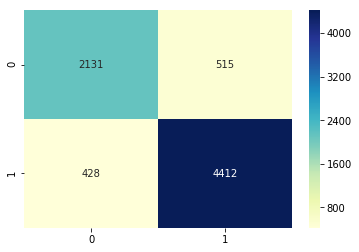

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf.fit(X_train, y_train) 

predictions = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
print(classification_report(y_test, predictions))

In [117]:
twits = [
    "Waste my time",
    "Good to use",
    "It's a great app",
    "Not good for me",
    "It 's not bad"
]

preds = clf.predict_proba(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> Negative, Positive = {preds[i]}')

Waste my time --> Negative, Positive = [0.64212963 0.35787037]
Good to use --> Negative, Positive = [0.00688004 0.99311996]
It's a great app --> Negative, Positive = [2.16554802e-06 9.99997834e-01]
Not good for me --> Negative, Positive = [0.90601155 0.09398845]
It 's not bad --> Negative, Positive = [0.14113015 0.85886985]
